Bei Qualitativen Daten handelt es sich um nicht numerische, meist verschriftlichen Daten.

Zur Visualisierung von quantitativen Daten werden meist Säulendiagramme und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.-seaborn.csv`) realisiert.

In [3]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [4]:
# Load the dataset in Python
# Use seaborn github dataset: ti = sns.load_dataset('titanic').reset_index(drop=True)
# Load dataset locally
ti = pd.read_csv('../data/titanic-seaborn.csv').reset_index(drop=True)
# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [5]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

In [6]:
%%R
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

In [7]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("../data/titanic-seaborn.csv", header = TRUE, sep=",")

# Calculate confidence interval: https://www.cyclismo.org/tutorial/R/confidence.html
ci <- function(x) {
    qnorm(0.975)*sd(x)/sqrt(length(x))
}

# Plot only text
# Source: https://stackoverflow.com/a/19920666/12347616
ptext <- function(text) {
    out <- toString(text)
    par(mar = c(0,0,0,0))
    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, paste(out), cex = 1.6, col = "black")
    par(mar = c(5, 4, 4, 2) + 0.1)
}

## Balkendiagramm (Bar Charts)
Ein Balkendiagramm bzw Säulendiagramm ist ein Diagramm, das kategoriale Daten mit rechteckigen Balken mit Höhen oder Längen proportional zu den Werten, die sie repräsentieren, darstellt. 

In `seaborn` gibt es zwei Arten von Balkendiagrammen. Der erste Typ `countplot` zählt die Anzahl, wie oft eine Kategorie in einer Spalte vorkommt. In R benutzt erstellt man eine Häufigkeitstabelle mit dem Befehl `table` und plottet dann das Balkendiagramm mit der Tabelle via `barplot`.

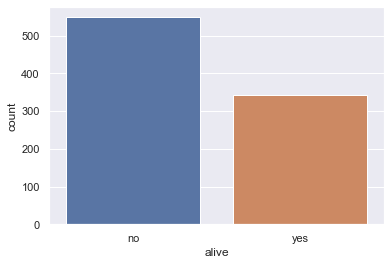

In [8]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=ti);

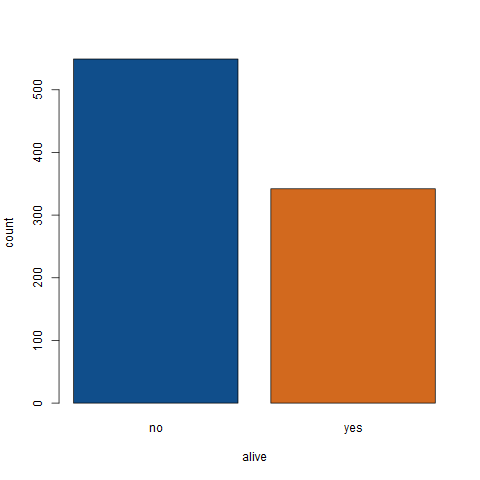

In [9]:
%%R
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive column
counts <- table(ti$alive)
barplot(counts, col=c("dodgerblue4", "chocolate"), xlab="alive", ylab="count")

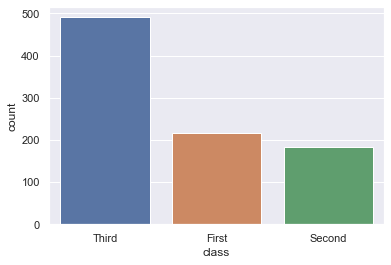

In [10]:
sns.countplot(x='class', data=ti);

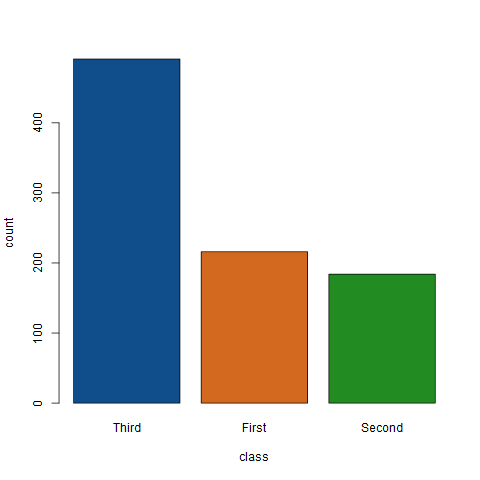

In [11]:
%%R
counts <- table(ti$class)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(sort(counts, decreasing=TRUE), col=c("dodgerblue4", "chocolate", "forestgreen"),
    xlab="class", ylab="count")

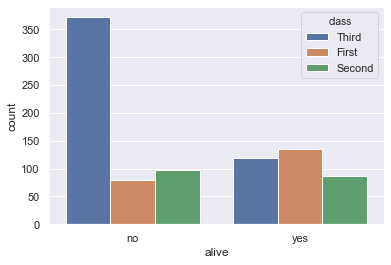

In [12]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=ti);

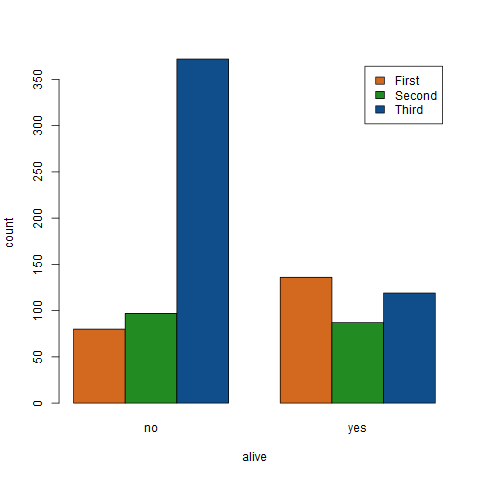

In [13]:
%%R
# Form a table with columns class and rows alive
counts <- table(ti$class, ti$alive)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE, xlab="alive", ylab="count"
)

Die zweite Funktion in Python `barplot` gruppiert die Kategorien einer Spalte und bildet für jede Kategorie den Durchschnitt einer angegebenen numerischen Spalte. Im nachfolgenden Beispiel wird für jede Kategorie in der Spalte `alive` das Durchschnittsalter für die Kategorie mtithilfe den Daten aus der Spalte `age` gebildet. 

Standardmäßig wird auch ein 95% Konfidenzintervall für jeden gemittelten Wert generiert, der als schwarze Linien im Balkendiagramm oben markiert ist. Die Konfidenzintervalle zeigen, dass, wenn der Datensatz eine Zufallsstichprobe von Titanic-Passagieren enthielt, der Unterschied zwischen dem Alter der Passagiere, die überlebt haben und denen, die nicht überlebt haben, nicht statistisch signifikant ist.

In R ist die Umsetzung mehr anspruchsvoll, denn man muss sich manuell die Durchnittswerte und Konfidenzintervalle ausrechnen. Weiters unterstützt die `barplot` Funktion keine Konfidenzintervalle, man muss diese mit dem Befehl `arrow` zum Plot hinzufügen. Dadurch können die Balken im Plot nicht sortiert werden, da sich dann die Konfidenzintervalle an der ursprünglichen Ausrichtung vorfinden würden.

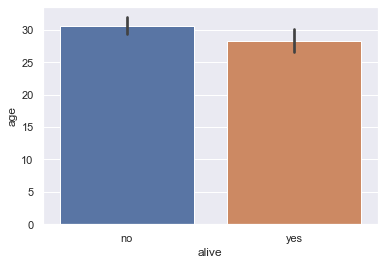

In [14]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=ti);

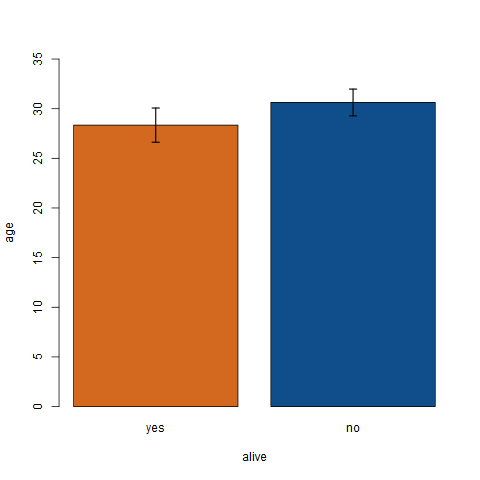

In [15]:
%%R
# Boxplot with confidence interval: https://datascienceplus.com/building-barplots-with-error-bars/
# Box names: https://stackoverflow.com/a/28417157/12347616
alive <- na.omit(ti$age[ti$alive=="yes"])
dead <- na.omit(ti$age[ti$alive=="no"])   
meanvals <- c(mean(alive), mean(dead))
# Note, sorting the boxes here results in wrong confidence interval arrows later on
theplot <- barplot(meanvals, xlab="alive", ylab="age",col=c("chocolate", "dodgerblue4"),
                  ylim=c(0, 35), names.arg=c("yes", "no"))
# Add confidence interval
civals <- c(ci(alive), ci(dead))
arrows(theplot, meanvals - civals, theplot,
       meanvals + civals, lwd = 1.5, angle = 90,
       code = 3, length = 0.05)

Eine leicht elegantere Methode Balkendiagramme mit Konfidenzintervallen in R zu bilden, ist die die Verwendung der Library `ggplot`. Man erspart sich nicht die Berechnungen, aber das Plotten der Intervalle mittels `geom_errorbar` ist einfacher nachvollzuziehen.

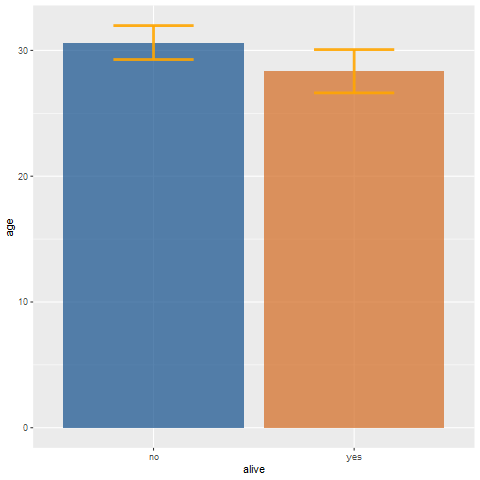

In [16]:
%%R
# Source: https://www.r-graph-gallery.com/4-barplot-with-error-bar.html
alive <- na.omit(ti$age[ti$alive=="yes"])
dead <- na.omit(ti$age[ti$alive=="no"])              
meanvals <- c(mean(alive), mean(dead))
civals <- c(ci(alive), ci(dead))

data <- data.frame(
  alive=c("yes", "no"),
  age=meanvals,
  sd=civals
)
 
ggplot(data) +
    geom_bar( aes(x=alive, y=age), stat="identity", fill=c("dodgerblue4", "chocolate"), alpha=0.7) +
    geom_errorbar( aes(x=alive, ymin=age-sd, ymax=age+sd), width=0.4, colour="orange", alpha=0.9, size=1.3)


Um die numerischen Werte der Balken zu ermitteln, können die folgenden Befehle verwendet werden.

In [17]:
ti[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,30.63
yes,28.34


In [18]:
%%R
# Aggregate function: https://stackoverflow.com/a/21983076/12347616
# Set names: https://stackoverflow.com/a/15309223/12347616
result <- setNames(aggregate(na.omit(ti$age), list(alive = ti$alive[!(is.na(ti$age))]), mean), c("alive", "age"))
result

Da die Berechnung von Konfidenzintervallen lange dauern kann, vor allem bei größeren Datensätzen, kann man deren automatische Berechnung in Python deaktivieren. In R geschieht dies ohnehin nicht automatisch, also erspart man sich zusätzlichen Code, der für Konfidenzintervalle nötig gewesen wäre.

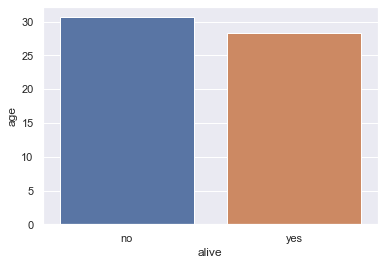

In [19]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

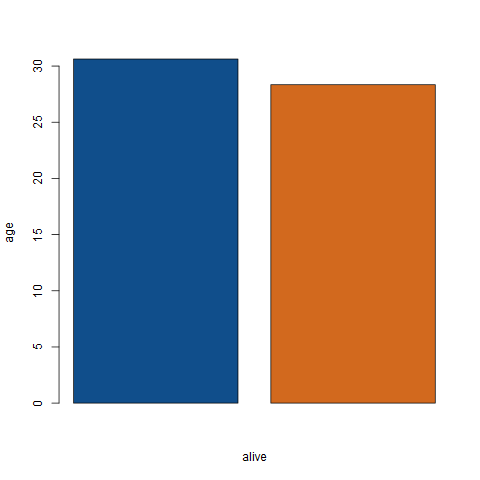

In [20]:
%%R
counts <- c(mean(na.omit(ti$age[ti$alive=="yes"])), mean(na.omit(ti$age[ti$alive=="no"])))
barplot(sort(counts, decreasing=TRUE), xlab="alive", ylab="age",col=c("dodgerblue4", "chocolate"))

## Dot-Plots (Dot Charts)
Dots-Plots bzw. Punktdiagramme kann man sich wie eindimensionale Streudiagramme vorstellen. Sie sind sehr ähnlich zu Balkendiagrammen. Anstatt die Werte als Balken darzustellen, werden diese als einzelne Punkte visualisiert.

In Python werden Dot-Plots mit der Funktion `pointplot` erstellt, die auch wieder die Konfidenzintervalle dazu erstellt, die als vertikale Striche über und unter den Punkten dargestellt werden.

In R ist die Umsetzung ähnlich zu der der Streudiagramme. Kategorien müssen für die Funktion `plot` numerisch in einen Vektor für die x-Achse eingetragen werden. Wichtig ist, dass man die Namen der Kategorien mittels dem `axis` Befehls darstellt. Die Konfidenzintervalle müssen wieder manuell berechnet werden. 

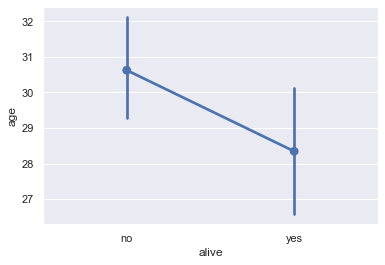

In [21]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.pointplot(x='alive', y='age', data=ti);

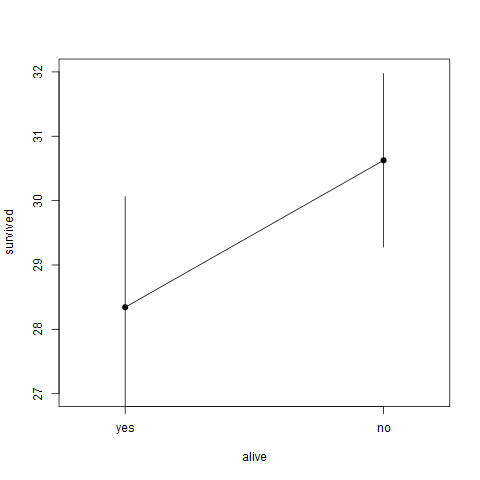

In [22]:
%%R
# Remove axis labels: https://stackoverflow.com/questions/1154242/remove-plot-axis-values
# Add own axis labels: https://stackoverflow.com/questions/5182238/replace-x-axis-with-own-values
# Draw segment lines: https://stackoverflow.com/a/24933288/12347616
x <- c(1, 2)
y <- c(mean(na.omit(ti$age[ti$alive=="yes"])), mean(na.omit(ti$age[ti$alive=="no"])))
conf <- c(ci(na.omit(ti$age[ti$alive=="yes"])), ci(na.omit(ti$age[ti$alive=="no"])))
plot(x, y, xaxt="n", xlab="alive", ylab="survived", pch=19, , ylim=c(27, 32), xlim=c(0.8, 2.2))
segments(x, y-conf, x, y+conf)
lines(x, y)
axis(1, at=1:2, labels=c("yes", "no"))

Dots-Plots sind am sinnvollsten, wenn man mehrere Kategorien miteinander vergleicht.

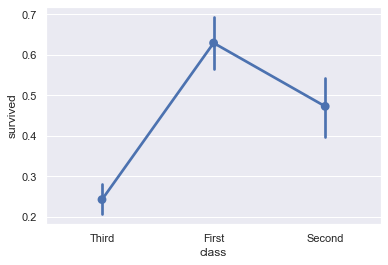

In [23]:
# Shows the proportion of survivors for each passenger class
sns.pointplot(x='class', y='survived', data=ti);

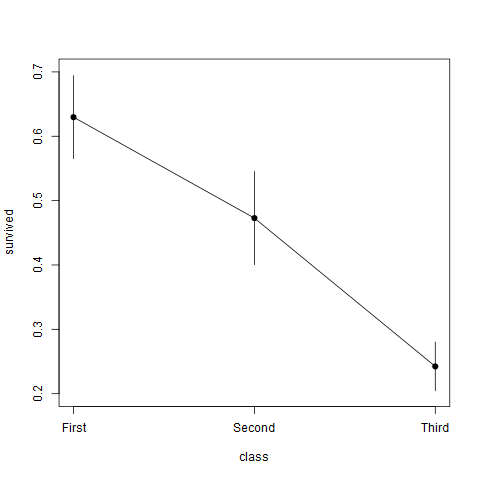

In [24]:
%%R
x <- c(1, 2, 3)
y <- c(mean(ti$survived[ti$class=="First"]),
       mean(ti$survived[ti$class=="Second"]),
       mean(ti$survived[ti$class=="Third"]))
conf <- c(ci(ti$survived[ti$class=="First"]),
          ci(ti$survived[ti$class=="Second"]),
          ci(ti$survived[ti$class=="Third"]))
plot(x, y, xaxt="n", xlab="class", ylab="survived", pch=19, ylim=c(0.2, 0.7))
lines(x, y)
segments(x, y-conf, x, y+conf)
axis(1, at=1:3, labels=c("First", "Second", "Third"))

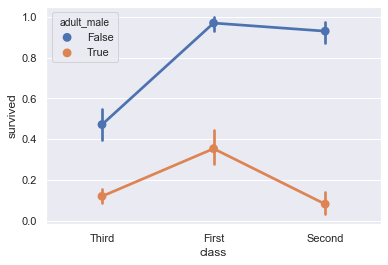

In [25]:
# Shows the proportion of survivors for each passenger class,
# split by whether the passenger was an adult male
sns.pointplot(x='class', y='survived', hue='adult_male', data=ti);

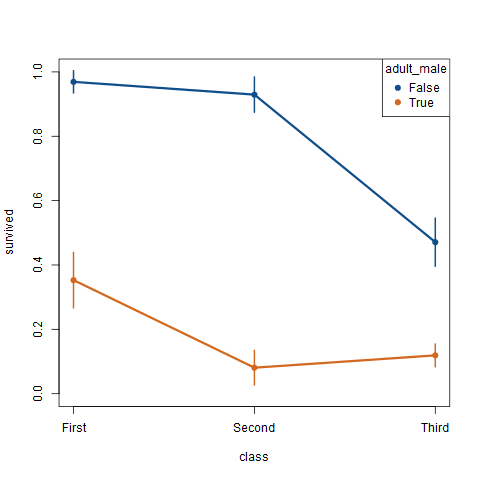

In [26]:
%%R
x <- c(1, 2, 3)
y <- c(mean(ti$survived[ti$class=="First" & ti$adult_male=="True"]), 
       mean(ti$survived[ti$class=="Second" & ti$adult_male=="True"]), 
       mean(ti$survived[ti$class=="Third" & ti$adult_male=="True"]))
conf <- c(ci(ti$survived[ti$class=="First" & ti$adult_male=="True"]), 
          ci(ti$survived[ti$class=="Second" & ti$adult_male=="True"]), 
          ci(ti$survived[ti$class=="Third" & ti$adult_male=="True"]))
x2 <- c(1, 2, 3)
y2 <- c(mean(ti$survived[ti$class=="First" & ti$adult_male=="False"]), 
        mean(ti$survived[ti$class=="Second" & ti$adult_male=="False"]), 
        mean(ti$survived[ti$class=="Third" & ti$adult_male=="False"]))
conf2 <- c(ci(ti$survived[ti$class=="First" & ti$adult_male=="False"]), 
           ci(ti$survived[ti$class=="Second" & ti$adult_male=="False"]), 
           ci(ti$survived[ti$class=="Third" & ti$adult_male=="False"]))

plot(x, y, xaxt="n", xlab="class",  ylab="survived", pch=19,
     col=c("chocolate"), ylim=c(0.0, 1.0))
lines(x, y, lwd=3, col=c("chocolate"))
segments(x, y-conf, x, y+conf, lwd=2, col=c("chocolate"))
points(x2, y2, pch=19, col=c("dodgerblue4"))
lines(x2, y2, lwd=3, col=c("dodgerblue4"))
segments(x2, y2-conf2, x2, y2+conf2, lwd=2, col=c("dodgerblue4"))
axis(1, at=1:3, labels=c("First", "Second", "Third"))
legend(x="topright", title="adult_male", legend=c("False", "True"), 
       col=c("dodgerblue4", "chocolate"),  pch=19)